<a href="https://colab.research.google.com/github/Mennakhalil-dev/Avatar-page/blob/main/CNN%2BVIT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [3]:
!unzip -q "/content/drive/MyDrive/SAIOD"

In [4]:
import os
os.makedirs("SAIOD", exist_ok=True)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.checkpoint import checkpoint
from torch.utils.data import Dataset
from torchvision import transforms, datasets, models
import torchvision
from fastai.vision.all import *
import os
from tempfile import TemporaryDirectory
import time
import pickle

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix




In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
train_dir = '/content/SAIOD Sikkim Aerial Images dataset for Object Detection/SAIOD/TrgVal'
test_dir = '/content/SAIOD Sikkim Aerial Images dataset for Object Detection/SAIOD/Tst'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)




Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
pip install --upgrade tensorflow tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
!pip uninstall keras -y
!pip install keras

Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.7 MB/s eta 0:00:00


In [9]:
pip uninstall tensorflow-addons -y


Found existing installation: tensorflow-addons 0.23.0
Uninstalling tensorflow-addons-0.23.0:
  Successfully uninstalled tensorflow-addons-0.23.0


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from transformers import AutoImageProcessor
import torch.cuda.amp as amp
from torchvision import models
from transformers import ViTModel

class CNN_ViT(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_ViT, self).__init__()

        #  Load Pretrained ResNet50 (CNN)
        self.cnn = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        self.cnn.fc = nn.Identity()  # Remove last classification layer

        #  Load Pretrained ViT
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

        #  Define Feature Dimensions
        cnn_output_dim = 2048
        vit_output_dim = 768

        #  Fully Connected Layers
        self.fc1 = nn.Linear(cnn_output_dim + vit_output_dim, 512)
        self.fc2 = nn.Linear(512, num_classes)

        #  Activation & Dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        #  CNN Feature Extraction
        cnn_features = self.cnn(x)

        #  ViT Feature Extraction (CLS Token)
        vit_output = self.vit(pixel_values=x).last_hidden_state[:, 0, :]

        #  Merge CNN & ViT Features
        combined = torch.cat((cnn_features, vit_output), dim=1)

        #  Fully Connected Layers
        x = self.fc1(combined)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

#  Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_ViT(num_classes=10).to(device)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 78.5MB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [11]:
#  Load Image Processor for ViT
feature_extractor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k', use_fast=True)

#  Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.expand(3, -1, -1) if x.shape[0] == 1 else x),  # Convert grayscale to RGB
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
])

batch_size = 32
#  Load Training Data
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder("/content/SAIOD Sikkim Aerial Images dataset for Object Detection/SAIOD/TrgVal", transform),
    batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True
)

#  Load Validation Data
val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder("/content/SAIOD Sikkim Aerial Images dataset for Object Detection/SAIOD/TrgVal", transform),
    batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True
)

#  Load Test Data
test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder("/content/SAIOD Sikkim Aerial Images dataset for Object Detection/SAIOD/Tst", transform),
    batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)



preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [12]:

best_acc = 0
num_epochs = 10
scaler = amp.GradScaler()  #  Enable Automatic Mixed Precision (AMP)

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    val_running_loss, val_correct, val_total = 0, 0, 0 # Initialize validation metrics

    for images, labels in train_loader: # Use train_loader
        images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        optimizer.zero_grad()

        with amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()
        total += labels.size(0)

    with torch.no_grad():
        model.eval()
        for images, labels in val_loader:
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            with amp.autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            val_correct += (outputs.argmax(1) == labels).sum().item()
            val_total += labels.size(0)



    val_acc = 100 * val_correct / val_total
    print(f'Epoch {epoch+1}: Loss={running_loss/len(train_loader):.4f}, Validation Loss={val_running_loss/len(val_loader):.4f}, Validation Acc={val_acc:.2f}%')

    #  Print Best Accuracy Achieved so Far
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")

    print(f' Best Accuracy So Far: {best_acc:.2f}%')  #  Print Best Accuracy

    scheduler.step(running_loss)

print(" Training Complete")

model.eval()
test_correct, test_total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test_correct += (model(images).argmax(1) == labels).sum().item()
        test_total += labels.size(0)

print(f' Final Test Accuracy: {100 * test_correct / test_total:.2f}%')


<ipython-input-12-1a4b88f6e2a3>:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()  #  Enable Automatic Mixed Precision (AMP)
<ipython-input-12-1a4b88f6e2a3>:14: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
<ipython-input-12-1a4b88f6e2a3>:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Epoch 1: Loss=0.6536, Validation Loss=0.1190, Validation Acc=96.64%
 Best Accuracy So Far: 96.64%
Epoch 2: Loss=0.1501, Validation Loss=0.0441, Validation Acc=98.76%
 Best Accuracy So Far: 98.76%
Epoch 3: Loss=0.0769, Validation Loss=0.0260, Validation Acc=99.32%
 Best Accuracy So Far: 99.32%
Epoch 4: Loss=0.0414, Validation Loss=0.0134, Validation Acc=99.63%
 Best Accuracy So Far: 99.63%
Epoch 5: Loss=0.0392, Validation Loss=0.0229, Validation Acc=99.31%
 Best Accuracy So Far: 99.63%
Epoch 6: Loss=0.0506, Validation Loss=0.0249, Validation Acc=99.15%
 Best Accuracy So Far: 99.63%
Epoch 7: Loss=0.0444, Validation Loss=0.0509, Validation Acc=98.28%
 Best Accuracy So Far: 99.63%
Epoch 8: Loss=0.0335, Validation Loss=0.0129, Validation Acc=99.63%
 Best Accuracy So Far: 99.63%
Epoch 9: Loss=0.0247, Validation Loss=0.0062, Validation Acc=99.83%
 Best Accuracy So Far: 99.83%
Epoch 10: Loss=0.0208, Validation Loss=0.0080, Validation Acc=99.76%
 Best Accuracy So Far: 99.83%
 Training Complete


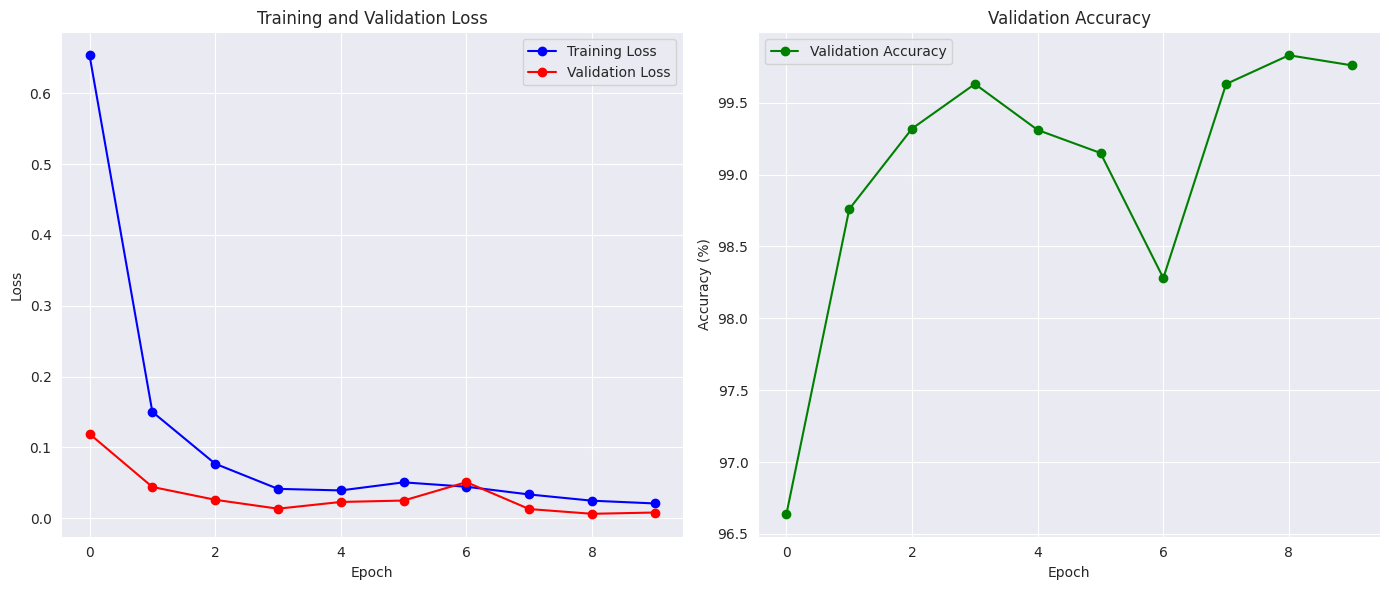

In [14]:
import matplotlib.pyplot as plt

# البيانات من نتائج التدريب
train_losses = [0.6536, 0.1501, 0.0769, 0.0414, 0.0392, 0.0506, 0.0444, 0.0335, 0.0247, 0.0208]
val_losses = [0.1190, 0.0441, 0.0260, 0.0134, 0.0229, 0.0249, 0.0509, 0.0129, 0.0062, 0.0080]
val_accuracies = [96.64, 98.76, 99.32, 99.63, 99.31, 99.15, 98.28, 99.63, 99.83, 99.76]

# إنشاء رسمة بيانية تحتوي على رسمتين (subplots)
plt.figure(figsize=(14, 6))

# الرسمة الأولى: خسارة التدريب والتحقق
plt.subplot(1, 2, 1)  # 1 صف، 2 أعمدة، الرسمة الأولى
plt.plot(train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(val_losses, label='Validation Loss', marker='o', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# الرسمة الثانية: دقة التحقق
plt.subplot(1, 2, 2)  # 1 صف، 2 أعمدة، الرسمة الثانية
plt.plot(val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# عرض الرسومات
plt.tight_layout()  # لمنع التداخل بين الرسومات
plt.show()

In [15]:
model.eval()
test_correct, test_total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test_correct += (model(images).argmax(1) == labels).sum().item()
        test_total += labels.size(0)

print(f' Final Test Accuracy: {100 * test_correct / test_total:.2f}%')


 Final Test Accuracy: 94.76%


In [19]:
#  Evaluate the model on the test data
test_loss = 0
test_correct = 0
test_total = 0

model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient calculations during inference
    for data, target in test_loader:  # Iterate over the test_loader (PyTorch DataLoader)
        data, target = data.to(device), target.to(device)  # Move data to the device (e.g., GPU)
        output = model(data)  # Get the model's predictions
        test_loss += criterion(output, target).item()  # Calculate the loss
        test_correct += (output.argmax(1) == target).sum().item()  # Count correct predictions
        test_total += target.size(0)  # Count total samples

test_accuracy = test_correct / test_total  # Calculate accuracy
print(f'Test Loss: {test_loss / len(test_loader):.4f}')  # Print average test loss
print(f'Test Accuracy: {test_accuracy:.4f}')  # Print test accuracy

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 0.2175
Test Accuracy: 0.9476


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Accuracy: 9.84%
Classification Report:
              precision    recall  f1-score   support

    Building       0.00      0.00      0.00       250
         Car       0.07      0.04      0.05       250
       Debri       0.07      0.00      0.01       250
      Ftpath       0.12      0.03      0.05       250
       Mroad       0.25      0.00      0.01       250
      Ofield       0.12      0.06      0.08       250
        Roof       0.07      0.13      0.10       250
      Shadow       0.09      0.11      0.10       250
        Tank       0.24      0.03      0.05       250
        Tree       0.10      0.58      0.18       250

    accuracy                           0.10      2500
   macro avg       0.11      0.10      0.06      2500
weighted avg       0.11      0.10      0.06      2500

Confusion Matrix:
[[  0  11   0   4   0   8  52  31   1 143]
 [  1   9   2   5   0  18  45  22   1 147]
 [  0   8   1   4   1  12  53  31   6 134]
 [  2  12   2   7   1  14  39  38   1 134]
 [  0  

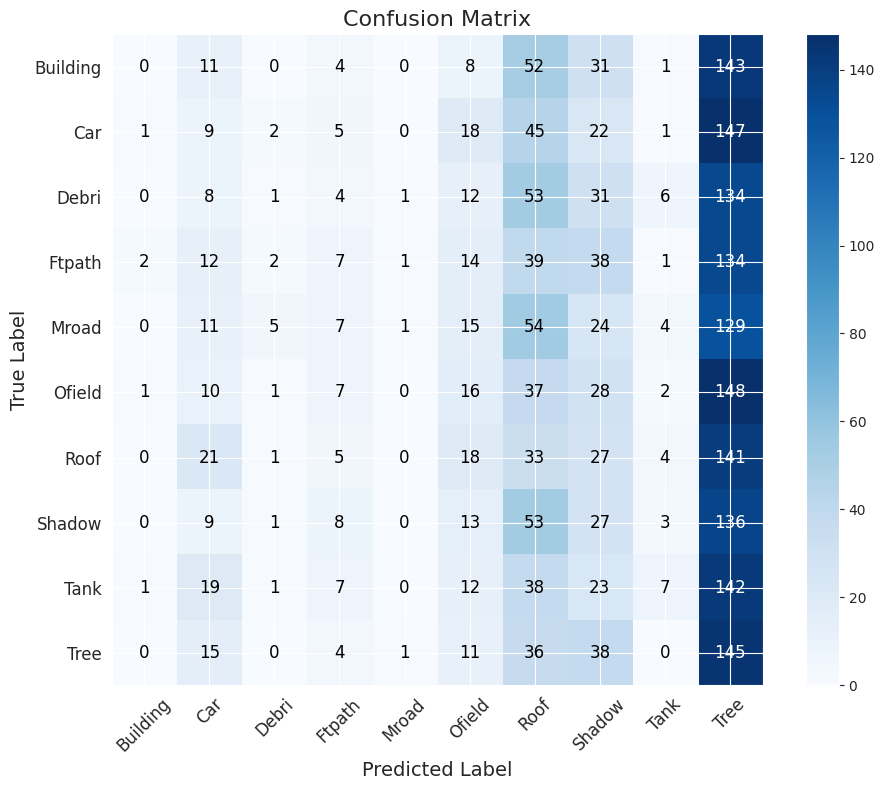

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from torchvision import datasets # Import datasets

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    # Add labels to the confusion matrix
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)

    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.tight_layout()
    plt.show()

# تقييم النموذج على بيانات الاختبار
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Classification report
# Assuming test_loader is created using datasets.ImageFolder
test_dataset = datasets.ImageFolder("/content/SAIOD Sikkim Aerial Images dataset for Object Detection/SAIOD/Tst", transform) # Define test_dataset
class_labels = test_dataset.classes  # Now you can access test_dataset.classes
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plot_confusion_matrix(cm, class_labels, title='Confusion Matrix')

In [34]:
model = CNN_ViT(num_classes=10)  # Ensure the model architecture is defined
model.load_state_dict(torch.load("best_model.pth"))  # Load saved weights
model.eval()  # Set the model to evaluation mode (important for inference)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-34-cfde7f2a7d48>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

CNN_ViT(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0):

In [35]:
torch.save(model, "CNN&ViT_complete_model.pth")  # Save the entire model (architecture + weights)


In [37]:
model = torch.load("CNN&ViT_complete_model.pth")  # Load the full model
model.eval()  # Set the model to evaluation mode for inference


<ipython-input-37-26a797740491>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("CNN&ViT_complete_model.pth")  # Load the full model


CNN_ViT(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0):